In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('gender_submission.csv')

# Data Exploration

In [379]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [380]:
print(train.shape), print(test.shape)

(891, 12)
(418, 11)


(None, None)

In [381]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [382]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [383]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [384]:
for i in train.columns:
  print (i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [0]:
object_features = train.dtypes[train.dtypes == 'object'].index

In [386]:
object_features

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [0]:
int_features = train.dtypes[train.dtypes == 'int'].index

In [388]:
int_features

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [389]:
for feature in object_features:
  print(feature, ':')
  print(train[feature].value_counts())
  print('----------------------')

Name :
Ali, Mr. Ahmed                                              1
Ibrahim Shawah, Mr. Yousseff                                1
Ball, Mrs. (Ada E Hall)                                     1
Frolicher-Stehli, Mr. Maxmillian                            1
Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)    1
                                                           ..
Tikkanen, Mr. Juho                                          1
Doling, Miss. Elsie                                         1
Fleming, Miss. Margaret                                     1
McCormack, Mr. Thomas Joseph                                1
Slocovski, Mr. Selman Francis                               1
Name: Name, Length: 891, dtype: int64
----------------------
Sex :
male      577
female    314
Name: Sex, dtype: int64
----------------------
Ticket :
1601                7
347082              7
CA. 2343            7
347088              6
3101295             6
                   ..
2671                1
STON/O

In [390]:
for feature in int_features:
  print(feature, ':')
  print(train[feature].value_counts())
  print('----------------------')

PassengerId :
891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64
----------------------
Survived :
0    549
1    342
Name: Survived, dtype: int64
----------------------
Pclass :
3    491
1    216
2    184
Name: Pclass, dtype: int64
----------------------
SibSp :
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
----------------------
Parch :
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
----------------------


In [391]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


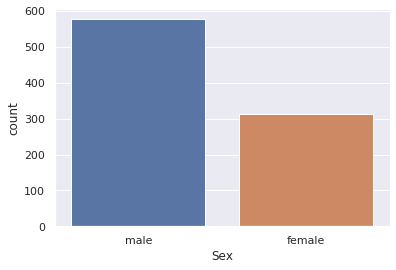

In [392]:
sns.countplot(train['Sex'])

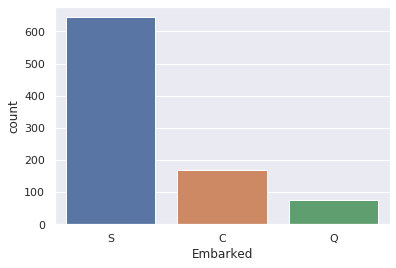

In [393]:
sns.countplot(train['Embarked'])

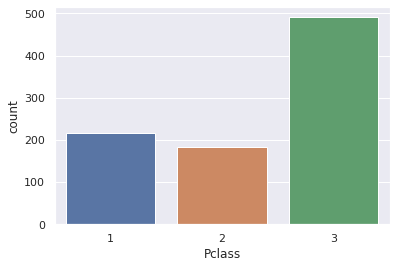

In [394]:
sns.countplot(train['Pclass'])

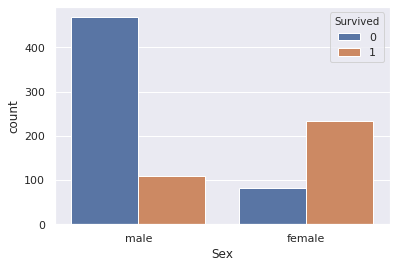

In [395]:
sns.countplot(x='Sex', hue='Survived', data=train)

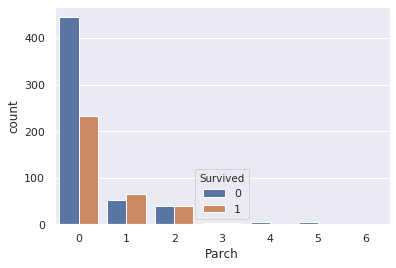

In [396]:
sns.countplot(x='Parch', hue='Survived', data=train)

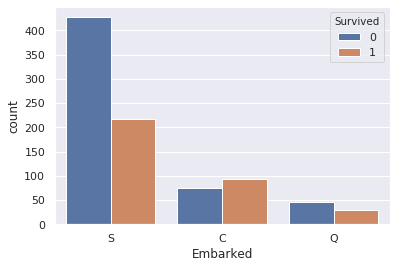

In [397]:
sns.countplot(x='Embarked', hue='Survived', data=train)

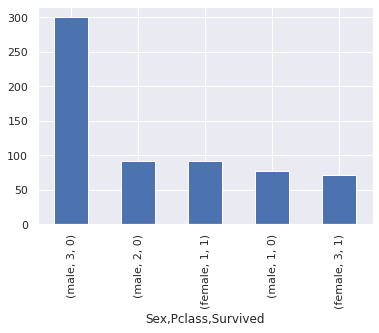

In [398]:
train.groupby(['Sex', 'Pclass'])['Survived'].value_counts().sort_values(ascending=False).head().plot(kind='bar')

In [0]:
# Data preprocessing

In [400]:
train.isnull().sum() / len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [401]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

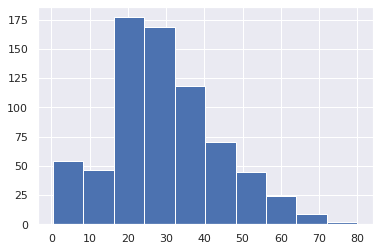

In [403]:
train['Age'].hist()

In [404]:
train['Age'].mean()

29.69911764705882

In [0]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [406]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [0]:
train['Embarked'] =  train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] =  test['Embarked'].fillna(test['Embarked'].mode()[0])

In [0]:
train['Fare'] = train['Fare'].fillna(value=0)
test['Fare'] = test['Fare'].fillna(value=0)

In [409]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [410]:
print(train['Sex'].nunique())
print(test['Sex'].nunique())

2
2


In [411]:
print(train['Embarked'].nunique())
print(test['Embarked'].nunique())

3
3


In [0]:
train = train.drop(['Name', 'Ticket'], axis=1)
test = test.drop(['Name', 'Ticket'], axis=1)

In [0]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [0]:
plt.rcParams['figure.figsize'] = [10,10]

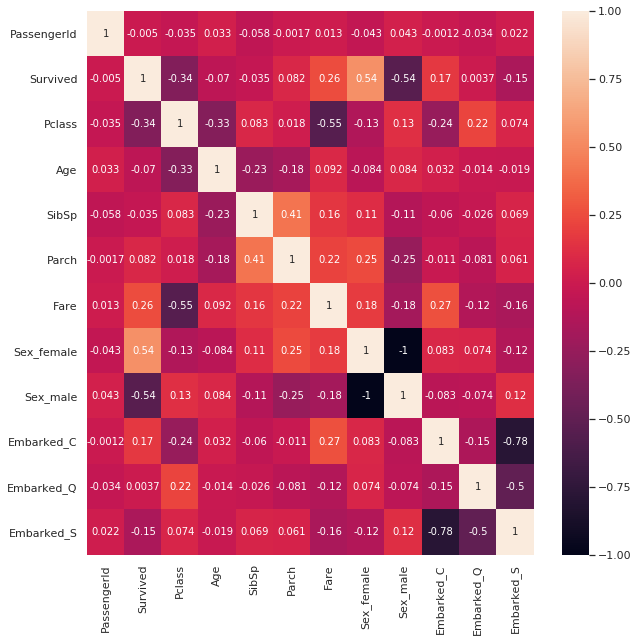

In [415]:
sns.heatmap(train.corr(), annot=True)

In [0]:
train = train.drop('Sex_male', axis=1)
test = test.drop('Sex_male', axis=1)

In [0]:
test_id = test['PassengerId']

In [0]:
train = train.drop('PassengerId', axis=1)
test = test.drop('PassengerId', axis=1)

In [0]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [420]:
X.shape

(891, 9)

In [421]:
test.shape

(418, 9)

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_scale = scale.fit_transform(X)
test_scale = scale.fit_transform(test)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size=0.15, random_state=101)

In [426]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(757, 9)
(134, 9)
(757,)
(134,)


In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression()

In [0]:
from sklearn.model_selection import cross_val_score

In [430]:
cross_val_score(lr, X_train, y_train, cv =3, )

array([0.80632411, 0.77777778, 0.81349206])

In [431]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [432]:
print(lr.score(X_train, y_train))

0.8071334214002642


In [433]:
print(lr.score(X_test, y_test))

0.7835820895522388


In [0]:
predict=lr.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [436]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81        81
           1       0.69      0.83      0.75        53

    accuracy                           0.78       134
   macro avg       0.78      0.79      0.78       134
weighted avg       0.80      0.78      0.79       134



In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
forest = RandomForestClassifier(n_estimators = 500, max_depth=5)

In [439]:
forest.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [440]:
print(forest.score(X_train,y_train))
print(lr.score(X_test, y_test))

0.37384412153236457
0.7835820895522388


In [441]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8071334214002642
0.7835820895522388


In [0]:
predict_forest = forest.predict(X_test)

In [443]:
print(classification_report(predict_forest,y_test))

              precision    recall  f1-score   support

           0       0.03      0.67      0.05         3
           1       0.98      0.48      0.65       131

    accuracy                           0.49       134
   macro avg       0.51      0.57      0.35       134
weighted avg       0.96      0.49      0.63       134



In [444]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,1
2,2,62.00000,0,0,9.6875,0,0,1,0
3,3,27.00000,0,0,8.6625,0,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,0,0,1
414,1,39.00000,0,0,108.9000,1,1,0,0
415,3,38.50000,0,0,7.2500,0,0,0,1
416,3,30.27259,0,0,8.0500,0,0,0,1


In [0]:
# Using decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier()

In [446]:
de.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [447]:
print(de.score(X_train, y_train))
print(de.score(X_test, y_test))

0.9867899603698811
0.746268656716418


In [0]:
predict_decision = de.predict(X_test)

In [449]:
print(classification_report(predict_decision,y_test))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        86
           1       0.61      0.81      0.70        48

    accuracy                           0.75       134
   macro avg       0.74      0.76      0.74       134
weighted avg       0.78      0.75      0.75       134



In [0]:
pred = forest.predict(test)

In [0]:
pd.DataFrame({'PassengerId':test_id, 'Survived':pred}).to_csv('night_of_code.csv', index=False)